![](https://holoviz.org/assets/landscape_hv_nx.png)

### Basic matplotlib

![](data/mpl_anatomy.png)

In [1]:
# Try qt5 or notebook later.
# You'll have to restart the kernel first!
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
import matplotlib


matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [3]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

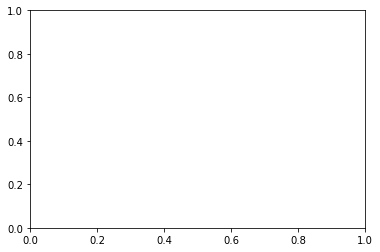

In [4]:
ax = plt.axes()

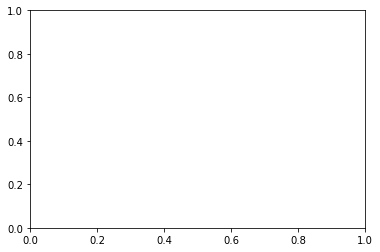

In [5]:
fig, ax = plt.subplots()

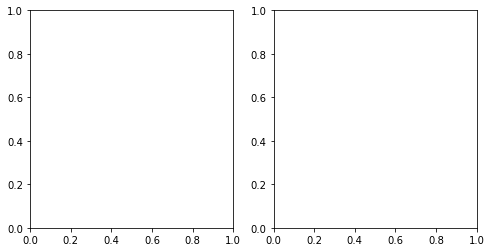

In [6]:
fig, ax = plt.subplots(
    figsize=(8, 4),
    ncols=2,
)

In [7]:
import pandas as pd


url = ("https://raw.githubusercontent.com/ocefpaf/"
       "2018-Jun-SWC-Floripa/master/data")

fname = "dados_pirata.csv"
df = pd.read_csv(
    f"{url}/{fname}",
    index_col='datahora',
    parse_dates=True,
    na_values=-99999,
)

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns = ['{0:0>3}'.format(col.split('_')[1]) for
              col in df.columns]

df.sort_index(axis=1, inplace=True)
df.head(10)

,001,005,010,013,020,040,060,080,100,120,140,180,300,500
datahora,,,,,,,,,,,,,,
2005-08-24 12:00:00+00:00,25.19,NaN,NaN,NaN,25.17,25.17,25.19,25.19,25.20,24.89,23.79,20.60,12.46,6.82
2005-08-25 12:00:00+00:00,25.19,NaN,NaN,NaN,25.18,25.18,25.21,25.18,25.17,24.72,23.61,20.31,12.27,6.85
2005-08-26 12:00:00+00:00,25.26,NaN,NaN,NaN,25.24,25.22,25.20,25.16,25.13,24.74,23.63,20.43,12.36,6.87
2005-08-27 12:00:00+00:00,25.23,NaN,NaN,NaN,25.19,25.19,25.14,25.08,25.04,24.77,23.74,20.10,12.23,6.86
2005-08-28 12:00:00+00:00,25.25,NaN,NaN,NaN,25.21,25.11,25.04,24.99,24.90,24.78,23.81,20.21,12.48,6.79
2005-08-29 12:00:00+00:00,25.33,NaN,NaN,NaN,25.27,25.12,25.03,24.94,24.89,24.43,23.51,19.93,12.29,6.87
2005-08-30 12:00:00+00:00,25.49,NaN,NaN,NaN,25.39,25.33,25.30,25.03,24.84,23.88,23.15,19.93,12.42,6.79
2005-08-31 12:00:00+00:00,25.47,NaN,NaN,NaN,25.43,25.44,25.39,25.16,24.91,23.92,23.22,20.01,12.47,6.88
2005-09-01 12:00:00+00:00,25.47,NaN,NaN,NaN,25.44,25.44,25.46,25.16,24.95,24.60,23.71,20.26,12.38,6.89


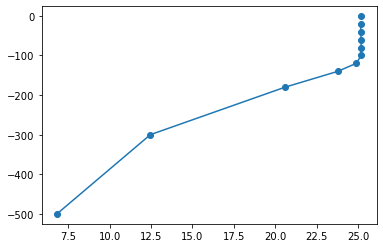

In [9]:
fig, ax = plt.subplots()

z = df.columns.astype(float)

ax.plot(df.iloc[0, :], -z, "-o");

## What are we plotting? Let's label!

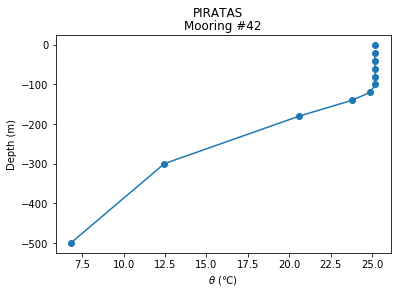

In [10]:
fig, ax = plt.subplots()

z = df.columns.astype(float)
ax.plot(df.iloc[0, :], -z, "-o")

fig.suptitle("PIRATAS")
ax.set_title("Mooring #42")
ax.set_xlabel(r"$\theta$ (℃)")
ax.set_ylabel("Depth (m)");

### We can customize the `ticks`...

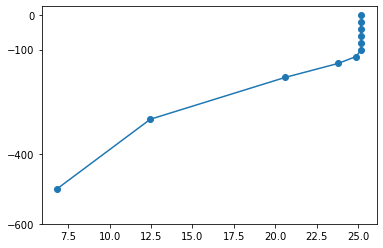

In [11]:
fig, ax = plt.subplots()

z = df.columns.astype(float)
ax.plot(df.iloc[0, :], -z, "-o")
ax.set_yticks([0, -100, -400, -600]);

###  ... and the `yticklabels()`.

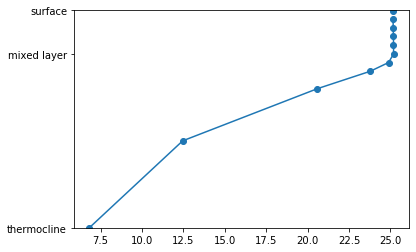

In [12]:
fig, ax = plt.subplots()

z = df.columns.astype(float)
ax.plot(df.iloc[0, :], z, "-o")
ax.invert_yaxis()
ax.set_yticks([0, 100, 500]);
ax.set_yticklabels(["surface", "mixed layer", "thermocline"]);

Exercise: We used `df.iloc[0, :]` to  plot the first time index versus the all depths.
Create for a time series (all time indexes) for a single depth and customize it.

In [ ]:
%load 00-mpl-basics-00-sol.py

### Plotting directly from pandas

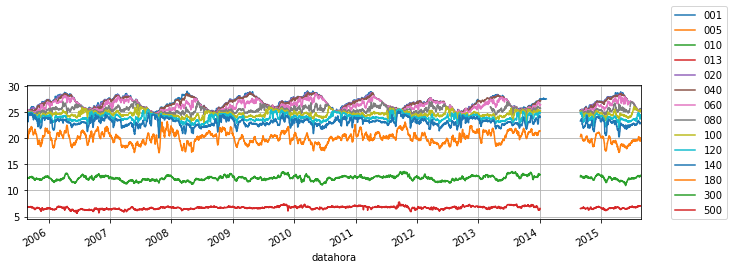

In [14]:
ax = df.plot(figsize=(11, 2.75))
ax.legend(loc=(1.05, 0))
ax.grid(True);

### This allow for a compact processing/plotting code

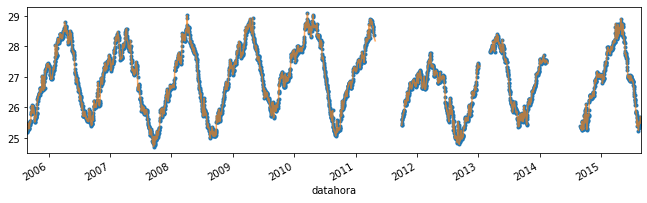

In [15]:
plot = {"marker": ".", "linestyle": "none", "figsize": (11, 3)}
interp = {"method": "time", "limit": 10}

df["001"].plot(**plot);
df["001"].interpolate(**interp).plot(alpha=0.65);

Exercise: check the `plt.subplots` documentation and create a subplot with two rows and 1 column. Plot different depths in the rows.

In [ ]:
%load 00-mpl-basics-01-sol.py

Exercise: load the file `15t30717.3f1` from the `url` below and plot the `u` and `v` time-series.

url = "https://raw.githubusercontent.com/ocefpaf/2018-Jun-SWC-Floripa/master/data/15t30717.3f1"

Note that this dataset is not labeled! (Welcome to the messy world of bad/absent metadata.)

Use `names = ["j", "u", "v", "temp", "sal", "y", "mn", "d", "h", "mi"]` in pandas to identify the columns.

bonus points: filter the tidal signal using pandas `rolling` method.

In [ ]:
%load 00-mpl-basics-02-sol.py

In [ ]:
%load 00-mpl-basics-03-sol.py

### This is only be beginning!

There are many tutorials on matplotlib out there. Here are a few resouces:

- https://github.com/matplotlib/GettingStarted
- https://matplotlib.org/gallery.html
- https://github.com/rougier/matplotlib-cheatsheet

In [ ]:
import hvplot.pandas


df[["v", "high", "low"]].hvplot()